## Import dat - nacteni dat ze souboru

## os

In [4]:
import os

print(os.getenv("HOME"))
print(os.getlogin())

/home/vaclav
vaclav


In [12]:
cwd = os.getcwd() # current working directory
print(cwd)
files = os.listdir(cwd)
print(files)

path = os.path.join(cwd, files[1])
print(os.path.split(path))

/data/unicorn/python/live
['.ipynb_checkpoints', 'cviceni06_interp.ipynb', 'cviceni03_interp.ipynb', 'cviceni07_interp.ipynb', 'cviceni02_python.ipynb', 'cviceni04_interp.ipynb', 'seminar02.ipynb', 'cviceni04_python.ipynb', 'cviceni05_python.ipynb', 'cviceni05_interp.ipynb', 'cviceni06_python.ipynb', 'seminar01.ipynb', 'cviceni02_interp.ipynb', 'cviceni03_python.ipynb', 'cviceni07_python.ipynb']
('/data/unicorn/python/live', 'cviceni06_interp.ipynb')


## cteni ze souboru

In [19]:
path_to_file = os.path.join("/data/unicorn/python/spolecne/cviceni07", "pyvenv.cfg")
f = open(path_to_file, "r")
data = f.read()
print(f.closed)
f.close()
print(f.closed)

print(type(data))
print(data.splitlines())

False
True
<class 'str'>
['home = /usr/bin', 'include-system-site-packages = false', 'version = 3.7.5']


In [26]:
with open(path_to_file, "r") as f:
    lines = f.readlines()
print(f.closed)
    
settings = {}
for line in lines:
    line = line.strip() # vymaze whitespace znaky ze zacatku a konce stringu
    key, val = line.split(" = ") # tuple/list unpacking
    settings[key] = val
    
print(settings)

True
{'home': '/usr/bin', 'include-system-site-packages': 'false', 'version': '3.7.5'}


In [28]:
with open(path_to_file, "r") as f:
    line = f.readline()
    print("1st line:", line.strip())
    line = f.readline()
    print("2nd line:", line.strip())

1st line: home = /usr/bin
2nd line: include-system-site-packages = false


## numpy - csv-like formats

In [32]:
path = "/data/unicorn/python/spolecne/cviceni07/topeni.txt"
with open(path, "r") as f:
    lines = f.readlines()

for line in lines[:15]:
    line = line.strip()
    if line[0] in ["#", "!", "/"]:
        continue
    print(line.split(" "))


['2014', '1', '15.925', '7908']
['2014', '2', '11.470', '5696']
['2014', '3', '8.017', '3981']
['2014', '4', '5.738', '2849']
['2014', '5', '3.453', '1715']
['2014', '6', '1.282', '636']
['2014', '7', '0.485', '241']
['2014', '8', '0.449', '223']
['2014', '9', '1.735', '862']
['2014', '10', '5.295', '2629']
['2014', '11', '7.465', '3707']
['2014', '12', '12.920', '6416']
['2015', '1', '13.205', '6870']
['2015', '2', '12.570', '6540']


[2014. 2015. 2016. 2017. 2018. 2019.]


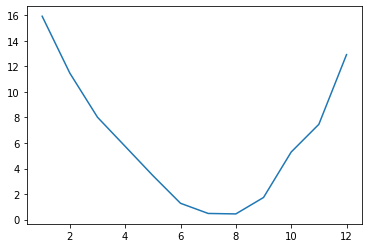

[2014 2015 2016 2017 2018 2019]


In [39]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt(path).transpose()

print(np.unique(data[0]))


plt.plot(data[1][:12], data[2][:12])
plt.show()

years = np.unique(data[0].astype("int"))

In [ ]:
import csv
with open(path,"r") as csvfile:
    reader = csv.reader(csvfile, delimiter = ' ')
    for row in reader:
        print(row)

## JSON - JavaScript Object Notation

In [49]:
import json

path = "/data/unicorn/python/spolecne/cviceni07/bibliography.json"

with open(path, "r") as f:
    bib = json.load(f)


def print_bib_entry_nicely(entry):
    authors = entry["author"]
    for author in authors:
        print("{}, {}., ".format(author["family"], author["given"][0]))
    
print_bib_entry_nicely(bib[0])

Itikawa, Y., 


## XML - eXtensible Markup Language

In [54]:
import xml.etree.ElementTree as ET

tree = ET.parse("/data/unicorn/python/spolecne/cviceni07/sample.xml")

root = tree.getroot()

for child in root:
    print(child.attrib)

{'name': 'Liechtenstein'}
{'name': 'Singapore'}
{'name': 'Panama'}


## .ini

In [61]:
import configparser as cp
config = cp.ConfigParser()
config.read("/data/unicorn/python/spolecne/cviceni07/sample.ini")

print(config)
for section in config:
    print(section)
    for key in config[section]:
        print("|- {}: {}".format(key, config[section][key]))


DEFAULT
|- var: value
mysql
|- host: localhost
|- user: user7
|- passwd: s$cret
|- db: ydb
|- var: value
postgresql
|- host: localhost
|- user: user8
|- passwd: mypwd$7
|- db: testdb
|- var: value


## excel

In [68]:
import xlrd # pip3 install xlrd

wb = xlrd.open_workbook("/data/unicorn/python/spolecne/cviceni07/topeni.xlsx")
sheet = wb.sheet_by_index(0)

for i in range(2, sheet.nrows-1):
    for j in range(2, sheet.ncols-1, 4):
        print("{:10.3f} ".format(sheet.cell_value(i, j)), end="")
    print("")


    15.925     13.205     13.329     12.812     13.813     14.215 
    11.470     12.570     10.145     11.362     11.623     10.154 
     8.017     10.404     11.733      7.281     10.990      7.776 
     5.738      7.337      6.876      4.738      5.762      5.975 
     3.453      3.095      3.963      3.493      1.840      5.030 
     1.282      1.642      1.014      0.922      1.080      0.962 
     0.485      0.590      0.811      0.635      0.711      0.927 
     0.449      0.686      1.050      0.852      0.961      0.845 
     1.735      2.293      1.808      3.480      0.773      1.740 
     5.295      6.432      5.883      4.771      6.729      4.736 
     7.465      8.691      9.527      9.138      7.076      7.890 
    12.920      9.850     10.480     10.024      7.426     11.392 
